<a href="https://colab.research.google.com/github/se6astians1mon/common-ground-cscl/blob/main/Topic-Modeling/topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Objective**:  Latent Dirichlet Allocation (LDA) models each document (or answer) as a probability distribution over latent topics (concepts), and each topic as a distribution over words. By extracting these topic distributions from each answer, we can identify common concepts and uncover shared ground among different answers. Additionally, Latent Semantic Analysis (LSA), a matrix decomposition technique based on Singular Value Decomposition (SVD), can also be utilized for topic modeling. Although LSA’s topics are less interpretable than LDA's, it can reveal latent patterns and hidden topics that LDA might miss by leveraging lower-dimensional word representations.




## 0. Setup (libs, import data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/DefineCSCL/results-survey875738.csv')
# df.columns

In [ ]:
# filter coloums that define

# Assuming you want to filter columns that contain the word "define" in their name
define_columns = [col for col in df.columns if 'define' in col.lower()]

# Create a new DataFrame with only the selected columns
text_df = df[define_columns]

# Print the new DataFrame
text_df = df[define_columns]

for column in text_df.columns:
  text_df[column] = text_df[column].str.replace('CSCL is', '')
  text_df[column] = text_df[column].str.replace('CSCL refers to', '')

<ipython-input-5-db4d9787d89e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column] = text_df[column].str.replace('CSCL is', '')
<ipython-input-5-db4d9787d89e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column] = text_df[column].str.replace('CSCL refers to', '')


In [ ]:
text_df

,How do you define CSCL (in one sentence)?,How do you define CL (Collaborative Learning) in CSCL?
0,"the use of computers, or software, that serve...",Collaborative learning (in CSCL) is a process ...
1,"Collaborative learning using the technology, m...",Students interacting or working on shared task...
2,the field that aims to understand and improve...,CL is both the learning of collaboration and l...
3,don't know,don't know
4,the study of collaboration aimed at learning,two or more students learn together and proble...
5,the use of scaffolding within digital tools a...,CL refers to a learning approach where individ...
6,the effective use of any kind of computerized...,CL is learning together through shared underst...
7,A pedagogical approach wherein collaborative l...,"Students work in small groups, helping and lea..."
8,A framework for researching and supporting wit...,The ability to learn collectively by means of ...
9,facilitating and enhancing the collaborative...,process of interacting with peers or computer ...


## 1. Pre-process data
Text cleaning, Tokenization, Lower casing, Steming/Lemmatization


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import re
import string

tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)
stop_words += ['__', '___']
# stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text,
                   text_cleaning=True,
                   tokenization=True,
                   lower_casing=True,
                   stemming_lemmatization=True,
                   stemming=True,
                   return_text=False):
  """
  Preprocesses text data by applying optional steps like text cleaning, tokenization,
  lower casing, and stemming/lemmatization.

  Args:
    text: The input text string.
    text_cleaning: Whether to perform text cleaning (removing special characters, etc.).
    tokenization: Whether to tokenize the text into individual words.
    lower_casing: Whether to convert the text to lowercase.
    stemming_lemmatization: Whether to perform stemming or lemmatization.
    stemming: If stemming_lemmatization is True, whether to perform stemming
              (True) or lemmatization (False).

  Returns:
    A list of preprocessed tokens (words) or the original text if no
    preprocessing steps are selected.
  """

  if text_cleaning:
    # Example text cleaning: Remove special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

  if tokenization:
    tokens = word_tokenize(text)
  else:
    tokens = [text]

  if lower_casing:
    tokens = [token.lower() for token in tokens]

  if stemming_lemmatization:
    if stemming:
      # Example stemming using PorterStemmer
      stemmer = nltk.stem.PorterStemmer()
      tokens = [stemmer.stem(token) for token in tokens]
    else:
      # Example lemmatization using WordNetLemmatizer
      lemmatizer = WordNetLemmatizer()
      tokens = [lemmatizer.lemmatize(token) for token in tokens]
  if return_text:
    # Join the tokens back into a single string
    tokens = ' '.join(tokens)

  return tokens

In [ ]:
preprocess_text('Students work in small groups, helping and lea...')

['student', 'work', 'in', 'small', 'group', 'help', 'and', 'lea']

In [ ]:
for column in text_df.columns:
  text_df[column] = text_df[column].apply(preprocess_text)

<ipython-input-9-54a01cb3450a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column] = text_df[column].apply(preprocess_text)


In [ ]:
CSCL_df = text_df['How do you define CSCL (in one sentence)? ']


## 2. Apply Latent Semantic Analysis (LSA)

In [ ]:
num_topics = 10

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

def apply_lsa(CSCL_df, num_topics = 10):
  """
  Applies Latent Semantic Analysis (LSA) to a DataFrame of text data.

  Args:
    CSCL_df: A pandas DataFrame with a single column of text data.
    num_topics: The number of latent topics to extract.

  Returns:
    A tuple containing:
      - The LSA model (TruncatedSVD) used for topic extraction
      - The TF-IDF vectorizer used to transform the text data
      - The transformed document-topic matrix (lsa_matrix)
  """

  # Create a TF-IDF vectorizer
  vectorizer = TfidfVectorizer(stop_words='english')

  # Fit and transform the text data
  tfidf_matrix = vectorizer.fit_transform(CSCL_df.astype(str))

  # Apply LSA (SVD) to reduce dimensionality and extract latent topics
  lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
  lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

  return lsa_model, vectorizer, lsa_matrix

# Example usage:
lsa_model, vectorizer, lsa_matrix = apply_lsa(CSCL_df)

# Print the top words for each topic (optional)
for i, component in enumerate(lsa_model.components_):
    top_words_indices = component.argsort()[:-11:-1]
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_words_indices]
    print(f"Topic {i + 1}: {', '.join(top_words)}")


Topic 1: learn, collabor, comput, use, facilit, aim, enhanc, studi, devic, process
Topic 2: aim, devic, studi, field, improv, electron, understand, support, framework, research
Topic 3: comput, place, pedagog, approach, use, tablet, mobil, mostli, internet, phone
Topic 4: dont, know, aim, internet, mobil, mostli, phone, tablet, technolog, studi
Topic 5: accommod, platform, computer, creat, effect, environ, materi, kind, ani, learn
Topic 6: technolog, mostli, phone, tablet, mobil, internet, learner, small, scaffold, group
Topic 7: support, framework, research, devic, enhanc, process, creat, accommod, computer, platform
Topic 8: pedagog, place, approach, process, studi, enhanc, learn, comput, aim, use
Topic 9: studi, process, framework, support, research, learn, aim, collabor, enhanc, tablet
Topic 10: process, enhanc, field, improv, understand, electron, facilit, internet, tablet, mobil


### find optimum number of topics using LSA

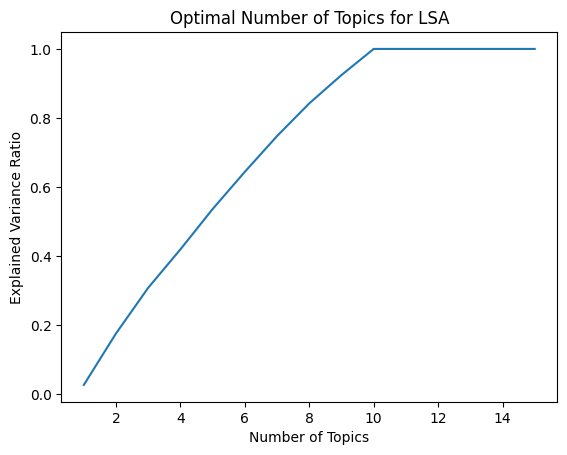

The optimal number of topics is: 2


In [ ]:
# find optimum number of topics using LSA

def find_optimal_num_topics(CSCL_df, max_topics=15):
  """
  Finds the optimal number of topics for LSA by analyzing the explained variance ratio.

  Args:
    CSCL_df: A pandas DataFrame with a single column of text data.
    max_topics: The maximum number of topics to consider.

  Returns:
    The optimal number of topics based on explained variance ratio.
  """

  explained_variance_ratios = []
  for num_topics in range(1, max_topics + 1):
    lsa_model, vectorizer, lsa_matrix = apply_lsa(CSCL_df, num_topics)
    explained_variance_ratios.append(lsa_model.explained_variance_ratio_.sum())

  # Plot the explained variance ratio for different numbers of topics
  plt.plot(range(1, max_topics + 1), explained_variance_ratios)
  plt.xlabel("Number of Topics")
  plt.ylabel("Explained Variance Ratio")
  plt.title("Optimal Number of Topics for LSA")
  plt.show()

  # Find the elbow point in the plot to determine the optimal number of topics
  # (This is a heuristic and may require visual inspection)
  # You can also use other techniques like silhouette score to determine the optimal number of topics
  # Implement your preferred elbow finding method here (e.g., using a library like kneed)
  # Here, we'll use a simple heuristic of looking for a point where the curve starts to flatten
  optimal_num_topics = None
  max_variance_increase = 0
  for i in range(len(explained_variance_ratios) - 1):
    variance_increase = explained_variance_ratios[i + 1] - explained_variance_ratios[i]
    if variance_increase < max_variance_increase:
        optimal_num_topics = i + 1  # The topic number before the variance increase decreases
        break
    max_variance_increase = variance_increase

  if optimal_num_topics is None:
      optimal_num_topics = max_topics

  return optimal_num_topics


# Example usage
optimal_num_topics = find_optimal_num_topics(CSCL_df)
print(f"The optimal number of topics is: {optimal_num_topics}")

### Visualize

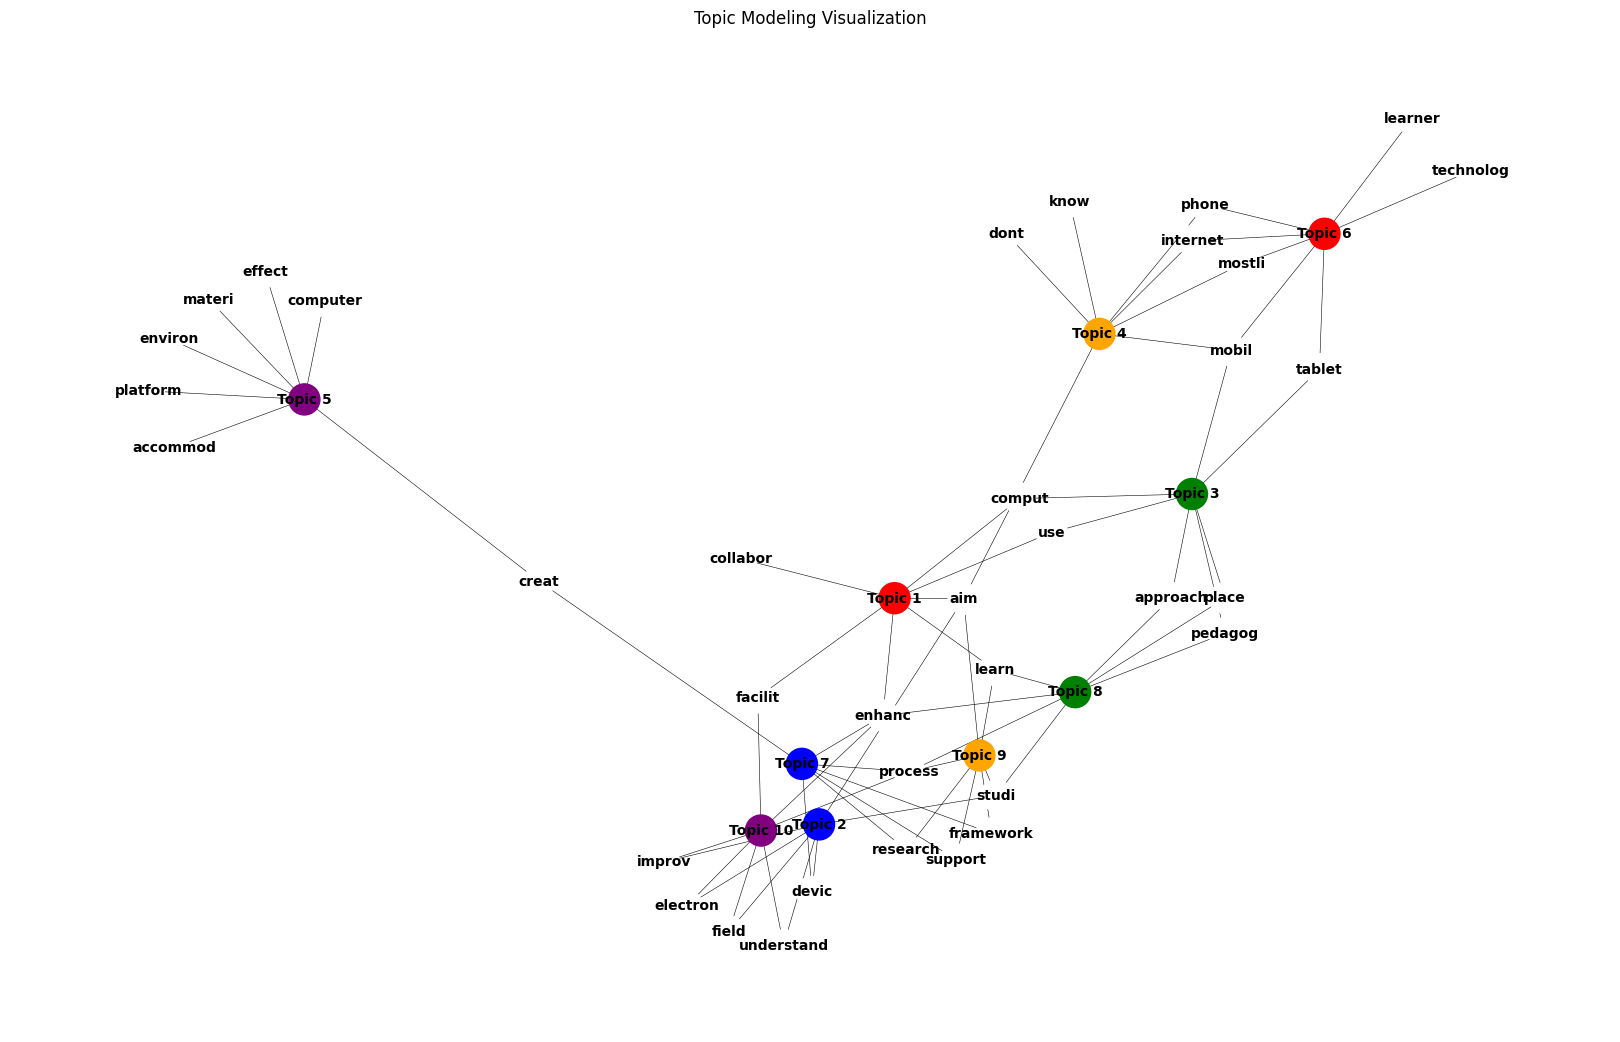

In [ ]:
# visualize topics and their words in a graph, show each topic with diffrent colors

import networkx as nx
import matplotlib.pyplot as plt

def visualize_topics(lsa_model, vectorizer, num_top_words=7):
  """
  Visualizes topics and their associated words in a graph.

  Args:
    lsa_model: The LSA model (TruncatedSVD).
    vectorizer: The TF-IDF vectorizer.
    num_top_words: The number of top words to display for each topic.
  """

  graph = nx.Graph()

  topic_colors = ['red', 'blue', 'green', 'orange', 'purple']  # Add more colors if needed

  for topic_idx, topic in enumerate(lsa_model.components_):
    top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_word_indices]

    graph.add_node(f"Topic {topic_idx + 1}", color=topic_colors[topic_idx % len(topic_colors)])
    for word in top_words:
      graph.add_node(word)
      graph.add_edge(f"Topic {topic_idx + 1}", word)

  node_colors = [nx.get_node_attributes(graph, 'color').get(node, 'white') for node in graph.nodes()]

  plt.figure(figsize=(16, 10))
  pos = nx.spring_layout(graph, seed=42)  # You can experiment with different layouts
  nx.draw(graph, pos, with_labels=True, node_color=node_colors, font_size=10, font_weight='bold', node_size=500, width=0.4)
  plt.title("Topic Modeling Visualization")
  plt.show()

# Assuming you have lsa_model and vectorizer from your previous code
visualize_topics(lsa_model, vectorizer)


<Axes: >

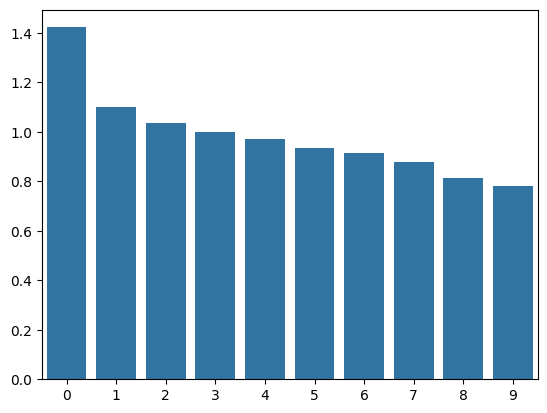

In [ ]:
Sigma = lsa_model.singular_values_
V_T = lsa_model.components_.T
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

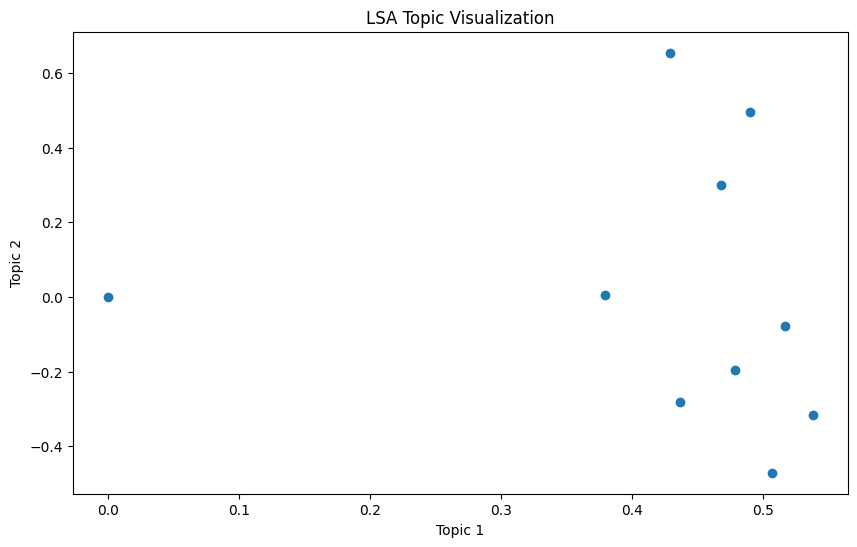

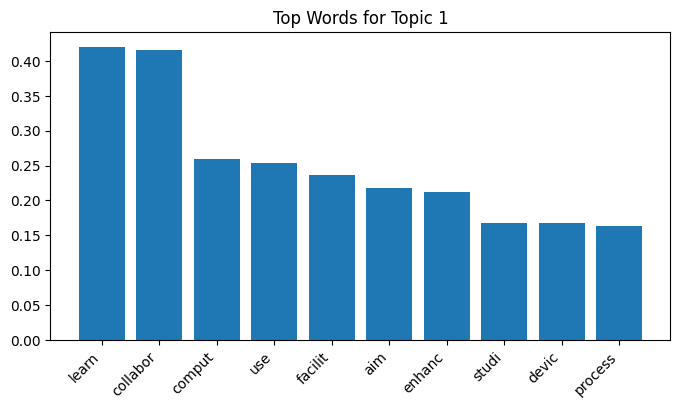

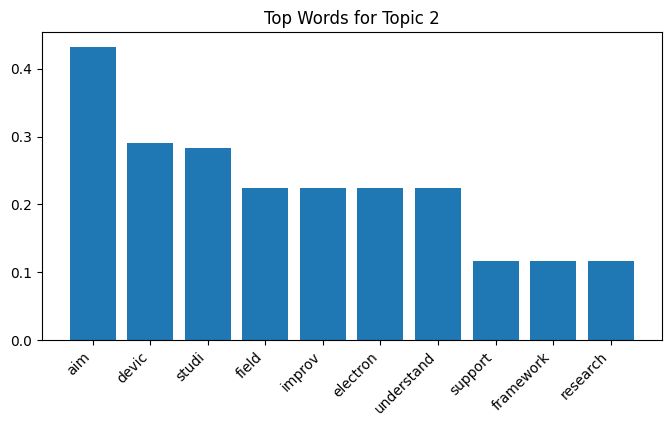

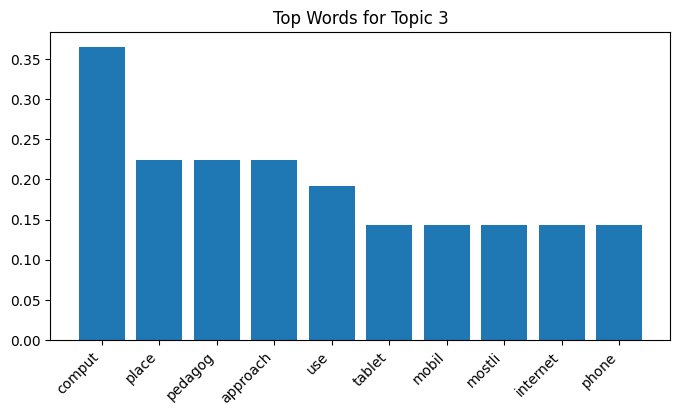

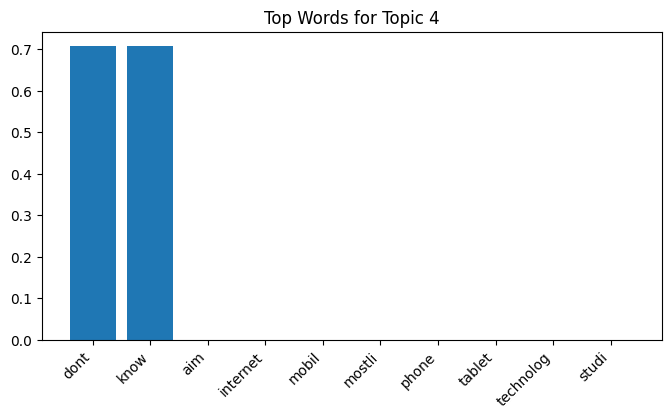

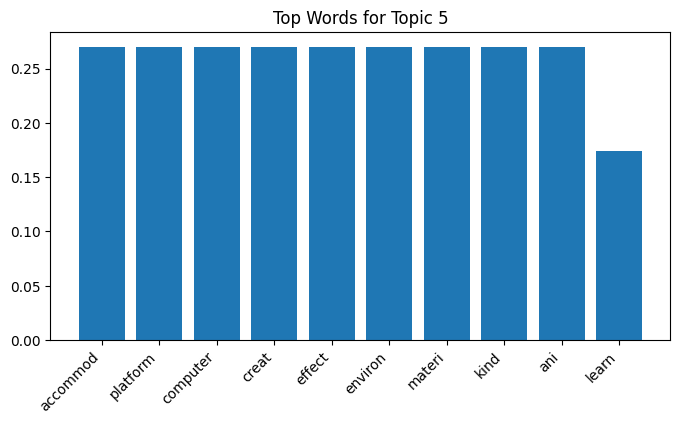

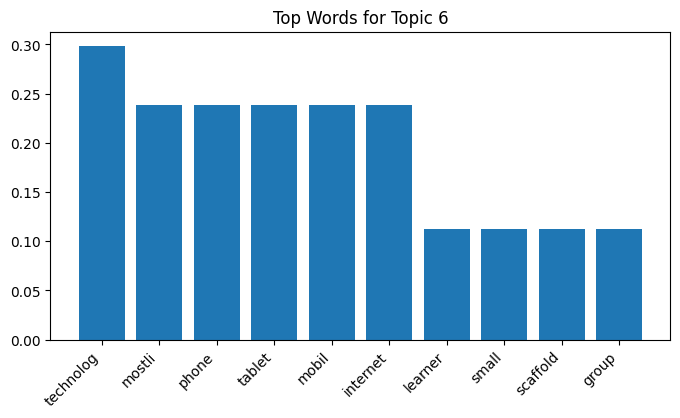

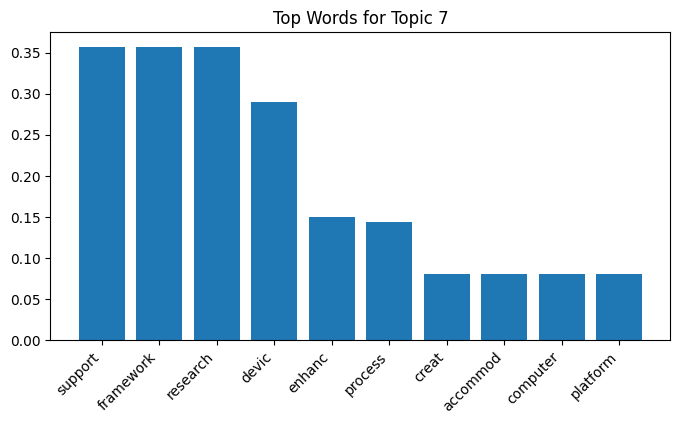

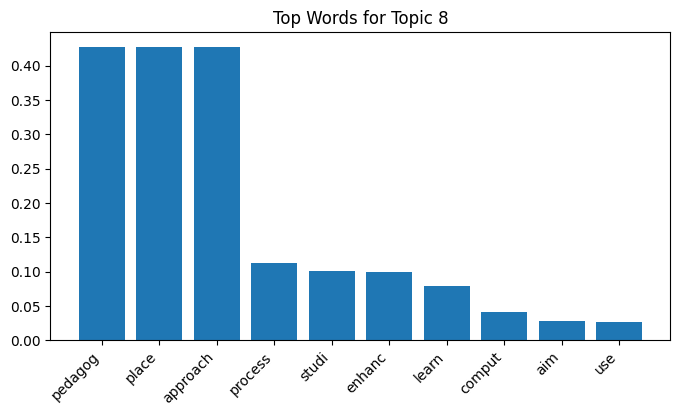

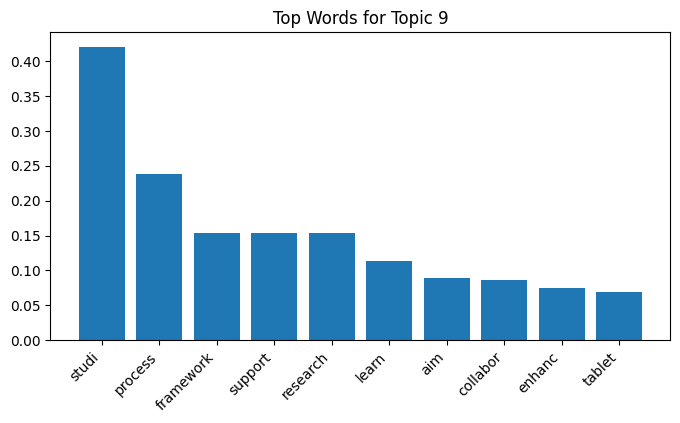

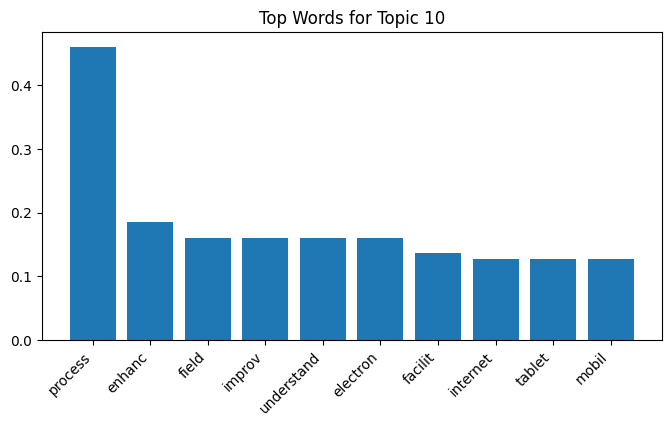

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'lsa_matrix' contains the LSA results
# You can visualize the topics using a scatter plot or other suitable methods
# Here's an example of a scatter plot to visualize the distribution of documents across topics:

plt.figure(figsize=(10, 6))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1])  # Use the first two components for visualization
plt.xlabel('Topic 1')
plt.ylabel('Topic 2')
plt.title('LSA Topic Visualization')
plt.show()

# a bar chart to visualize the top words for each topic
for i, component in enumerate(lsa_model.components_):
    top_words_indices = component.argsort()[:-11:-1]
    top_words = [vectorizer.get_feature_names_out()[index] for index in top_words_indices]
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(top_words)), component[top_words_indices])
    plt.xticks(range(len(top_words)), top_words, rotation=45, ha='right')
    plt.title(f'Top Words for Topic {i + 1}')
    plt.show()


###

## 3. Word embedding using an appropriate embedding model


## 4. Dimension reduction/transformation: Such as t-SNE, PCA and etc.

## 5. Create Document-Word Matrix:
Create a document-word matrix based on the embeddings by averaging or summing the embeddings of the words in each answer. This transformation converts each answer into a single vector in the embedding space, which can then be used for LDA or other analysis.
